In [ ]:
"""Fornberg algorithm by William Taylor"""

In [26]:

from __future__ import division
import numpy as np
from scipy.special import factorial
from collections import namedtuple

def _assert(cond, msg):
    if not cond:
        raise ValueError(msg)
def fd_weights_all(x, x0=0, n=1):
    """
    Return finite difference weights for derivatives of all orders up to n.

    Parameters
    ----------
    x : vector, length m
        x-coordinates for grid points
    x0 : scalar
        location where approximations are to be accurate
    n : scalar integer
        highest derivative that we want to find weights for

    Returns
    -------
    weights :  array, shape n+1 x m
        contains coefficients for the j'th derivative in row j (0 <= j <= n)

    Notes
    -----
    The x values can be arbitrarily spaced but must be distinct and len(x) > n.

    The Fornberg algorithm is much more stable numerically than regular
    vandermonde systems for large values of n.

    
    """
    m = len(x)
    _assert(n < m, 'len(x) must be larger than n')

    weights = np.zeros((m, n + 1))
    _fd_weights_all(weights, x, x0, n)
    return weights.T

def _fd_weights_all(weights, x, x0, n):
    m = len(x)
    c1, c4 = 1, x[0] - x0
    weights[0, 0] = 1
    for i in range(1, m):
        j = np.arange(0, min(i, n) + 1)
        c2, c5, c4 = 1, c4, x[i] - x0
        for v in range(i):
            c3 = x[i] - x[v]
            c2, c6, c7 = c2 * c3, j * weights[v, j - 1], weights[v, j]
            weights[v, j] = (c4 * c7 - c6) / c3
        weights[i, j] = c1 * (c6 - c5 * c7) / c2
        c1 = c2


In [27]:
import numpy as np
fd_weights_all(np.arange(-6,7), x0=0, n=2)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00],
       [ 1.80375180e-04, -2.59740260e-03,  1.78571429e-02,
        -7.93650794e-02,  2.67857143e-01, -8.57142857e-01,
         1.48029737e-16,  8.57142857e-01, -2.67857143e-01,
         7.93650794e-02, -1.78571429e-02,  2.59740260e-03,
        -1.80375180e-04],
       [-6.01250601e-05,  1.03896104e-03, -8.92857143e-03,
         5.29100529e-02, -2.67857143e-01,  1.71428571e+00,
        -2.98277778e+00,  1.71428571e+00, -2.67857143e-01,
         5.29100529e-02, -8.92857143e-03,  1.03896104e-03,
        -6.01250601e-05]])

In [28]:
def fd_weights(x, x0=0, n=1):
    """
    Return finite difference weights for the n'th derivative.

    Parameters
    ----------
    x : vector
        abscissas used for the evaluation for the derivative at x0.
    x0 : scalar
        location where approximations are to be accurate
    n : scalar integer
        order of derivative. Note for n=0 this can be used to evaluate the
        interpolating polynomial itself.
    """
    return fd_weights_all(x, x0, n)[-1]



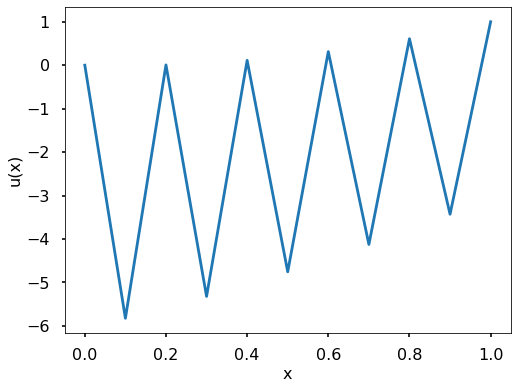

In [34]:
# 2ND ORDER N = 10
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams.update({"font.size": 11})

a= 0.001
n = 10
h = (1)/n

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = a/(h**2)-1/(2*h)
    A[i, i] = -(2*a)/(h**2)
    A[i, i+1] = a/(h**2)+1/(2*h)



# Get b
b = np.zeros(n+1)
for i in range(1,n):
    b[i] = 1+2*(h*i)
b[n] = 1


# solve the linear equations
y = np.linalg.solve(A, b)

x = np.linspace(0, 1, n+1)

plt.figure(figsize=(8,6))
plt.plot(x, y)
#plt.title('A graph showing 2nd order accuracy finite difference solution to the ODE using 10 grid points')
plt.xlabel('x', fontsize=16)
plt.ylabel('u(x)', fontsize=16)
plt.show()

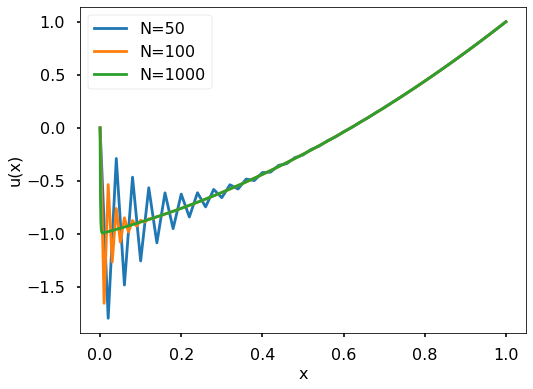

In [35]:
# 2ND ORDER VARYING NUMBER OF GRID POINTS
plt.style.use('seaborn-poster')
%matplotlib inline
a= 0.001
plt.figure(figsize=(8,6))

for n in [50, 100, 1000]:
    
    h = (1)/n

    # Get A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = 1
    for i in range(1, n):
        A[i, i-1] = a/(h**2)-1/(2*h)
        A[i, i] = -(2*a)/(h**2)
        A[i, i+1] = a/(h**2)+1/(2*h)


    # Get b
    b = np.zeros(n+1)
    for i in range(1,n):
        b[i] = 1+2*(h*i)
    b[n] = 1


    # solve the linear equations
    y = np.linalg.solve(A, b)

    x = np.linspace(0, 1, n+1)

    
    plt.plot(x, y, label=f"N={n}")
    plt.xlabel('x', fontsize=16)
    plt.ylabel('u(x)', fontsize=16)
    #plt.title('A graph showing 2nd order accuracy finite difference solutions to the ODE, varying number of grid points')
plt.legend()
plt.show()

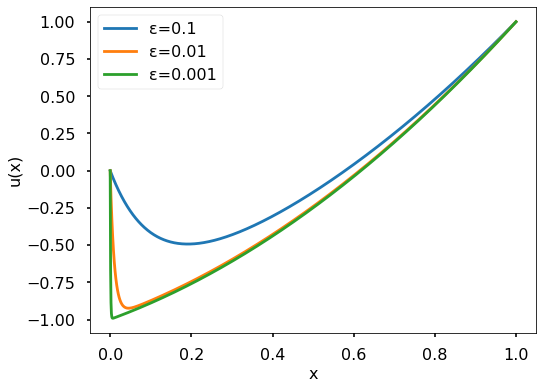

In [36]:
# 2ND ORDER VARYING EPSILON
%matplotlib inline
n = 1000
plt.figure(figsize=(8,6))

for a in [0.1, 0.01, 0.001]:
    
    h = (1)/n

    # Get A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = 1
    for i in range(1, n):
        A[i, i-1] = a/(h**2)-1/(2*h)
        A[i, i] = -(2*a)/(h**2)
        A[i, i+1] = a/(h**2)+1/(2*h)



    # Get b
    b = np.zeros(n+1)
    for i in range(1,n):
        b[i] = 1+2*(h*i)
    b[n] = 1


    # solve the linear equations
    y = np.linalg.solve(A, b)

    x = np.linspace(0, 1, n+1)

    
    plt.plot(x, y, label = f"ε={a}")
    plt.xlabel('x', fontsize=16)
    plt.ylabel('u(x)', fontsize=16)
    #plt.title('A graph showing 2nd order accuracy finite difference solutions to the ODE, varying epsilon')
plt.legend()
plt.show()

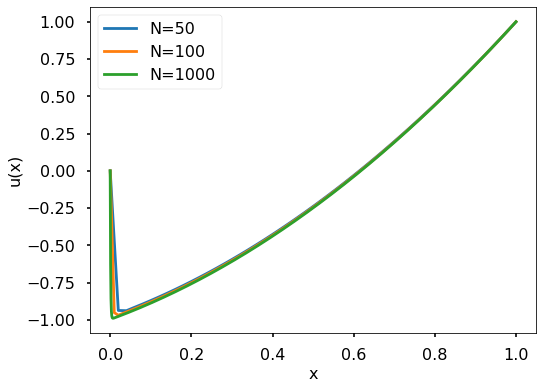

In [37]:
# 12TH ORDER VARYING NUMBER OF GRID POINTS
plt.style.use('seaborn-poster')
%matplotlib inline
a= 0.001
plt.figure(figsize=(8,6))
for n in [50, 100, 1000]:
    h = (1)/n

    # Get A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = 1
    A[1,0:13] = (a/(h**2))*(fd_weights(np.arange(-1,12),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-1,12),x0=0.5,n=1))
    A[2,0:13] = (a/(h**2))*(fd_weights(np.arange(-2,11),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-2,11),x0=0.5,n=1))
    A[3,0:13] = (a/(h**2))*(fd_weights(np.arange(-3,10),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-3,10),x0=0.5,n=1))
    A[4,0:13] = (a/(h**2))*(fd_weights(np.arange(-4,9),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-4,9),x0=0.5,n=1))
    A[5,0:13] = (a/(h**2))*(fd_weights(np.arange(-5,8),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-5,8),x0=0.5,n=1))
    A[6,0:13] = (a/(h**2))*(fd_weights(np.arange(-6,7),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-6,7),x0=0.5,n=1))

    for i in range(7, n-5):
        A[i, i-6:i+7] = (a/(h**2))*(fd_weights(np.arange(-6,7),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-6,7),x0=0.5,n=1))
    A[n-5,n-12:n+1] = (a/(h**2))*(fd_weights(np.arange(-7,6),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-7,6),x0=0.5,n=1))
    A[n-4,n-12:n+1] = (a/(h**2))*(fd_weights(np.arange(-8,5),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-8,5),x0=0.5,n=1))
    A[n-3,n-12:n+1] = (a/(h**2))*(fd_weights(np.arange(-9,4),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-9,4),x0=0.5,n=1))
    A[n-2,n-12:n+1] = (a/(h**2))*(fd_weights(np.arange(-10,3),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-10,3),x0=0.5,n=1))
    A[n-1,n-12:n+1] = (a/(h**2))*(fd_weights(np.arange(-11,2),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-11,2),x0=0.5,n=1))
    
    # Get b
    b = np.zeros(n+1)
    for i in range(1,n):
        b[i] = 1+2*(h*i)
    b[n] = 1
    

    # solve the linear equations
    y = np.linalg.solve(A, b)

    x = np.linspace(0, 1, n+1)


    plt.plot(x, y, label = f"N={n}")
    plt.xlabel('x', fontsize=16)
    plt.ylabel('u(x)', fontsize=16)
    #plt.title('A graph showing 12th order accuracy finite difference solutions to the ODE, varying number of grid points')
plt.legend()
plt.show()

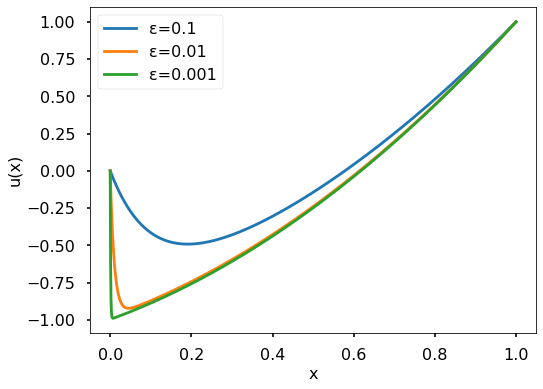

In [38]:
plt.style.use('seaborn-poster')
%matplotlib inline
n = 1000
plt.figure(figsize=(8,6))
for a in [0.1, 0.01, 0.001]:
    h = (1)/n

    # Get A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = 1
    A[1,0:13] = (a/(h**2))*(fd_weights(np.arange(-1,12),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-1,12),x0=0.5,n=1))
    A[2,0:13] = (a/(h**2))*(fd_weights(np.arange(-2,11),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-2,11),x0=0.5,n=1))
    A[3,0:13] = (a/(h**2))*(fd_weights(np.arange(-3,10),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-3,10),x0=0.5,n=1))
    A[4,0:13] = (a/(h**2))*(fd_weights(np.arange(-4,9),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-4,9),x0=0.5,n=1))
    A[5,0:13] = (a/(h**2))*(fd_weights(np.arange(-5,8),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-5,8),x0=0.5,n=1))
    A[6,0:13] = (a/(h**2))*(fd_weights(np.arange(-6,7),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-6,7),x0=0.5,n=1))

    for i in range(7, n-5):
        A[i, i-6:i+7] = (a/(h**2))*(fd_weights(np.arange(-6,7),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-6,7),x0=0.5,n=1))
    A[n-5,n-12:n+1] = (a/(h**2))*(fd_weights(np.arange(-7,6),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-7,6),x0=0.5,n=1))
    A[n-4,n-12:n+1] = (a/(h**2))*(fd_weights(np.arange(-8,5),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-8,5),x0=0.5,n=1))
    A[n-3,n-12:n+1] = (a/(h**2))*(fd_weights(np.arange(-9,4),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-9,4),x0=0.5,n=1))
    A[n-2,n-12:n+1] = (a/(h**2))*(fd_weights(np.arange(-10,3),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-10,3),x0=0.5,n=1))
    A[n-1,n-12:n+1] = (a/(h**2))*(fd_weights(np.arange(-11,2),x0=0.5,n=2)) + (1/h)*(fd_weights(np.arange(-11,2),x0=0.5,n=1))
    
    # Get b
    b = np.zeros(n+1)
    for i in range(1,n):
        b[i] = 1+2*(h*i)
    b[n] = 1

    # solve the linear equations
    y = np.linalg.solve(A, b)

    x = np.linspace(0, 1, n+1)


    plt.plot(x, y, label = f"ε={a}")
    plt.xlabel('x', fontsize=16)
    plt.ylabel('u(x)', fontsize=16)
    #plt.title('A graph showing 12th order accuracy finite difference solutions to the ODE, varying epsilon')
plt.legend()
plt.show()